In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("cars.csv")

In [ ]:
df

,Name,Type,AWD,RWD,Retail Price,Dealer Cost,Engine Size (l),Cyl,Horsepower(HP),City Miles Per Gallon,Highway Miles Per Gallon,Weight,Wheel Base,Len,Width
0,Acura 3.5 RL 4dr,Sedan,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,Acura 3.5 RL w/Navigation 4dr,Sedan,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,Acura MDX,SUV,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,Acura NSX coupe 2dr manual S,Sports Car,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,Acura RSX Type S 2dr,Sedan,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Volvo S80 2.9 4dr,Sedan,0,0,37730,35542,2.9,6,208,20,28,3576,110,190,72
383,Volvo S80 T6 4dr,Sedan,0,0,45210,42573,2.9,6,268,19,26,3653,110,190,72
384,Volvo V40,Wagon,0,0,26135,24641,1.9,4,170,22,29,2822,101,180,68
385,Volvo XC70,Wagon,1,0,35145,33112,2.5,5,208,20,27,3823,109,186,73


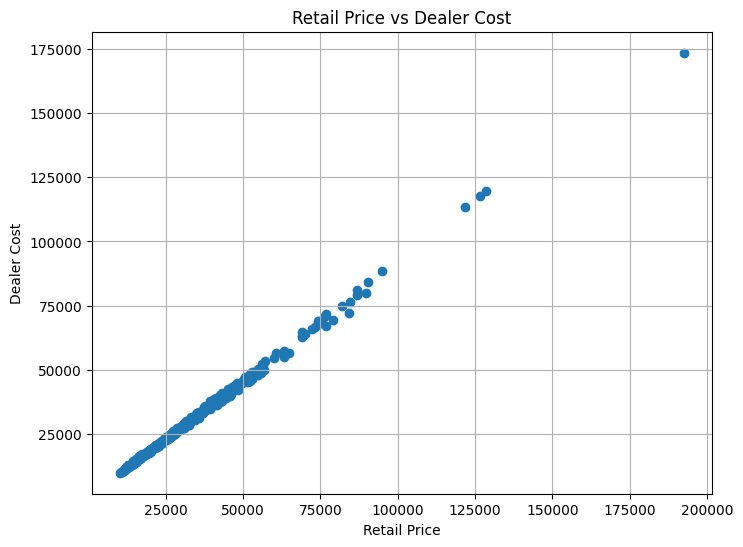

In [ ]:
#First scatterplot - Retail Price / Dealer Costs

plt.figure(figsize=(8,6))
plt.scatter(df['Retail Price'],df['Dealer Cost'])
plt.xlabel('Retail Price')
plt.ylabel('Dealer Cost')
plt.title('Retail Price vs Dealer Cost')
plt.grid(True)

plt.show()

We can see that the relationship between retail price and dealer cost is mostly linear

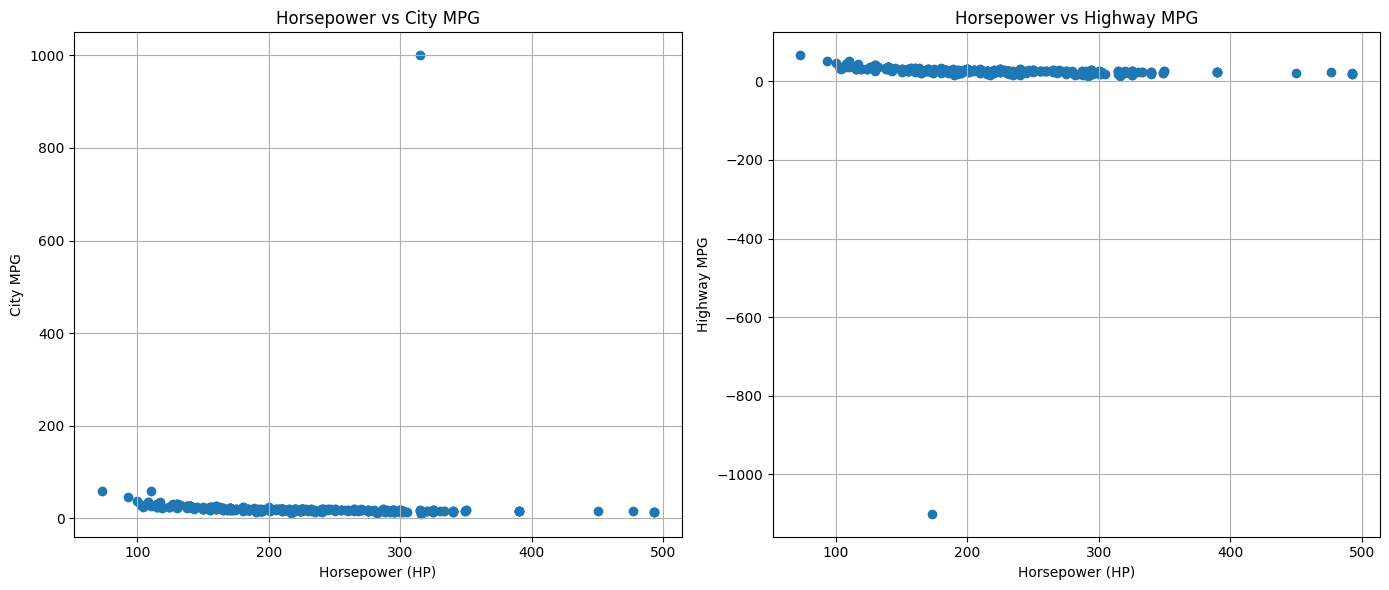

In [ ]:
plt.figure(figsize=(14,6))

# --- Plot 1: HP vs City MPG ---
plt.subplot(1, 2, 1)
plt.scatter(df["Horsepower(HP)"], df["City Miles Per Gallon"])
plt.xlabel("Horsepower (HP)")
plt.ylabel("City MPG")
plt.title("Horsepower vs City MPG")
plt.grid(True)

# --- Plot 2: HP vs Highway MPG ---
plt.subplot(1, 2, 2)
plt.scatter(df["Horsepower(HP)"], df["Highway Miles Per Gallon"])
plt.xlabel("Horsepower (HP)")
plt.ylabel("Highway MPG")
plt.title("Horsepower vs Highway MPG")
plt.grid(True)

plt.tight_layout()
plt.show()

We can see that Miles per Gallon is higher in Highway than in the City.

Correlation Matrix:
                               AWD       RWD  Retail Price  Dealer Cost  \
AWD                       1.000000 -0.284576      0.107505     0.103484   
RWD                      -0.284576  1.000000      0.469575     0.469560   
Retail Price              0.107505  0.469575      1.000000     0.999127   
Dealer Cost               0.103484  0.469560      0.999127     1.000000   
Engine Size (l)           0.143031  0.313543      0.591718     0.586075   
Cyl                       0.116324  0.405090      0.640202     0.637175   
Horsepower(HP)            0.130836  0.429881      0.835074     0.832650   
City Miles Per Gallon     0.071390 -0.052218     -0.042785    -0.042990   
Highway Miles Per Gallon -0.011718  0.010869     -0.016033    -0.016622   
Weight                    0.382896  0.070427      0.475994     0.471963   
Wheel Base                0.066030  0.059961      0.157450     0.158003   
Len                      -0.016066  0.016245      0.209553     0.206878   
Width

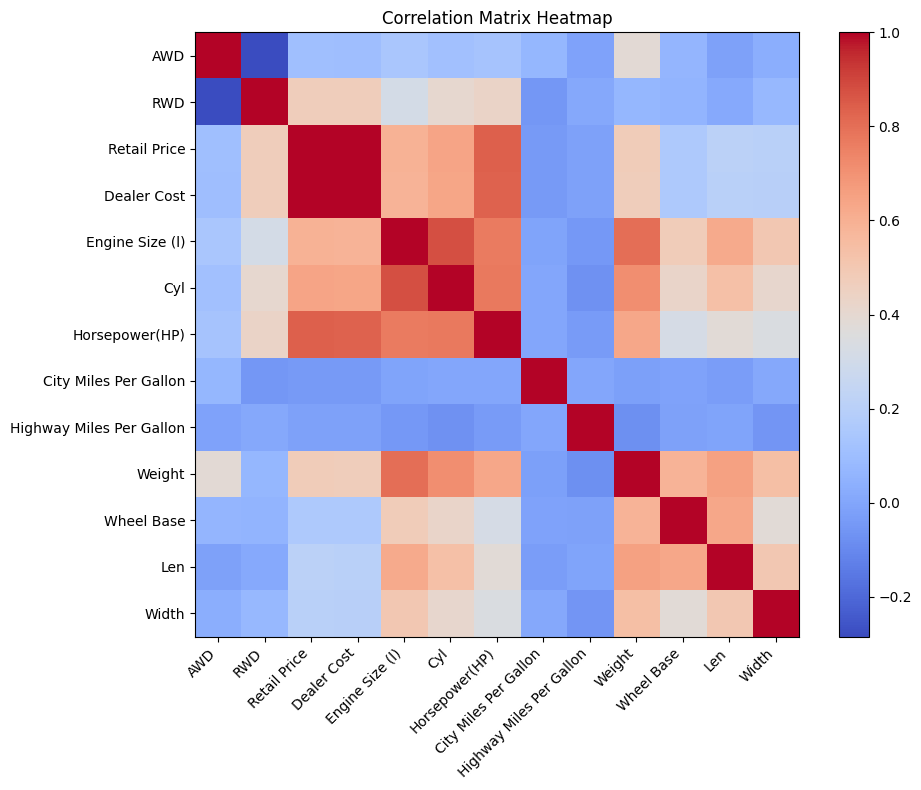

In [ ]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Display the matrix
print("Correlation Matrix:")
print(corr)

# Plot heatmap
plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.title("Correlation Matrix Heatmap")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.tight_layout()
plt.show()

There are big correlations: for example, AWD with RWD, Dealer Cost with Retail Price and Engine Size with Cyl

Calculate the outliers


In [ ]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=["number"])

outliers = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Boolean mask for outliers
    mask = (numeric_df[col] < lower) | (numeric_df[col] > upper)
    outliers[col] = df[mask]

# Show summary
for col, rows in outliers.items():
    print(f"\n=== Outliers for {col} ({len(rows)} found) ===")


=== Outliers for AWD (78 found) ===

=== Outliers for RWD (94 found) ===

=== Outliers for Retail Price (25 found) ===

=== Outliers for Dealer Cost (25 found) ===

=== Outliers for Engine Size (l) (1 found) ===

=== Outliers for Cyl (3 found) ===

=== Outliers for Horsepower(HP) (9 found) ===

=== Outliers for City Miles Per Gallon (25 found) ===

=== Outliers for Highway Miles Per Gallon (13 found) ===

=== Outliers for Weight (10 found) ===

=== Outliers for Wheel Base (7 found) ===

=== Outliers for Len (6 found) ===

=== Outliers for Width (3 found) ===


In [31]:
# Remove rows where Engine Size is 0
df_clean = df[df["Engine Size (l)"] != 0]

print("Rows before:", len(df))
print("Rows after removing Engine Size = 0:", len(df_clean))

Rows before: 387
Rows after removing Engine Size = 0: 386


AWD and RWD include a lot of outliers, as Well as City Miles per Gallon, Retail Price and Dealer Cost

Based on this analysis, we can make a scatterplot of Engine Size, Horsepower, Wheel Base and

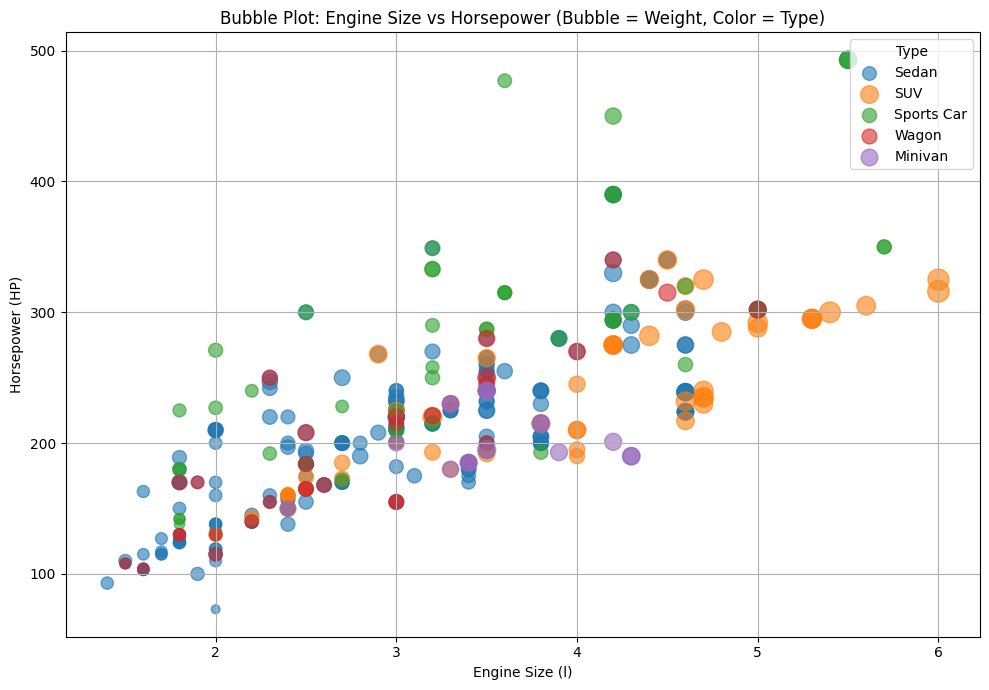

In [33]:
plt.figure(figsize=(10,7))

# Normalize bubble sizes so weights look visually balanced
sizes = (df_clean["Weight"] - df["Weight"].min()) / (df["Weight"].max() - df["Weight"].min())
sizes = 200 * (sizes + 0.2)   # adjust multiplier for better appearance

types = df_clean["Type"].unique()

# Plot each Type separately for proper legend
for t in types:
    subset = df_clean[df_clean["Type"] == t]
    plt.scatter(
        subset["Engine Size (l)"],
        subset["Horsepower(HP)"],
        s=sizes[subset.index],
        alpha=0.6,
        label=t
    )

plt.xlabel("Engine Size (l)")
plt.ylabel("Horsepower (HP)")
plt.title("Bubble Plot: Engine Size vs Horsepower (Bubble = Weight, Color = Type)")
plt.legend(title="Type")
plt.grid(True)
plt.tight_layout()
plt.show()
